#AQI Prediction Model using Python

- PM2.5 PM10
- NO, NO2
- NH3-Ammonia
- CO
- So2
- O3
- Benzene, Toluene, Xylene

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
#there are two ways to see the data
#1.a "Series" is a one-dimensional labeled array, essentially representing a single column of data,
#while a "DataFrame" is a two-dimensional data structure with rows and columns
df = pd.read_csv('/content/air quality data.csv')


In [5]:
df.head() #top 5 rows

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
df.shape
#shape- rows and columns

(11693, 16)

In [6]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11693 entries, 0 to 11692
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        11693 non-null  object 
 1   Date        11693 non-null  object 
 2   PM2.5       10394 non-null  float64
 3   PM10        7639 non-null   float64
 4   NO          10581 non-null  float64
 5   NO2         10684 non-null  float64
 6   NOx         10523 non-null  float64
 7   NH3         8545 non-null   float64
 8   CO          10713 non-null  float64
 9   SO2         10463 non-null  float64
 10  O3          10337 non-null  float64
 11  Benzene     9909 non-null   float64
 12  Toluene     9331 non-null   float64
 13  Xylene      4201 non-null   float64
 14  AQI         10293 non-null  float64
 15  AQI_Bucket  10293 non-null  object 
dtypes: float64(13), object(3)
memory usage: 1.4+ MB


In [7]:
#to check duplicate values
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
11688,False
11689,False
11690,False
11691,False


In [8]:
df.duplicated().sum()

0

In [9]:
#to check missing values
df.isnull()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
1,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
2,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
3,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
4,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11688,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11689,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11690,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11691,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,1299
PM10,4054
NO,1112
NO2,1009
NOx,1170
NH3,3148
CO,980
SO2,1230


In [11]:
#drop the rows where 'AQI' has missing values
df.dropna(subset=['AQI'], inplace=True)

In [12]:
df.isnull().sum().sort_values(ascending=False)

,0
Xylene,6395
PM10,2900
NH3,2140
Toluene,1493
Benzene,953
O3,444
SO2,329
NOx,283
NO,200
PM2.5,185


In [13]:
df.shape

(10293, 16)

In [14]:
#summary of statistics in the dataset
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,10108.000000,7393.000000,10093.000000,10181.000000,10010.000000,8153.000000,10186.000000,9964.000000,9849.000000,9340.000000,8800.000000,3898.000000,10293.000000
mean,59.729775,121.160476,16.655936,30.981325,30.888706,32.642448,4.025832,15.746756,34.903067,3.171768,9.042503,4.127119,176.607112
std,51.920678,95.596780,21.341685,28.137218,28.637708,33.838250,10.618908,22.123366,22.372370,10.280927,18.388783,7.562623,178.198513
min,0.160000,0.210000,0.030000,0.050000,0.000000,0.020000,0.000000,0.480000,0.040000,0.000000,0.000000,0.000000,18.000000
25%,28.760000,56.990000,5.700000,13.050000,13.462500,12.160000,0.590000,5.490000,18.990000,0.167500,0.720000,0.220000,78.000000
50%,45.135000,94.230000,10.030000,21.480000,22.280000,23.690000,0.920000,8.915000,31.170000,1.210000,2.260000,1.745000,112.000000
75%,72.470000,151.360000,18.430000,38.560000,38.495000,41.230000,1.770000,15.132500,46.310000,3.652500,8.132500,6.035000,211.000000
max,868.660000,917.080000,390.680000,292.020000,378.240000,352.890000,175.810000,186.080000,257.730000,391.880000,411.520000,137.450000,2049.000000


In [15]:
 df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,10108.0,59.729775,51.920678,0.16,28.7600,45.135,72.4700,868.66
PM10,7393.0,121.160476,95.596780,0.21,56.9900,94.230,151.3600,917.08
NO,10093.0,16.655936,21.341685,0.03,5.7000,10.030,18.4300,390.68
NO2,10181.0,30.981325,28.137218,0.05,13.0500,21.480,38.5600,292.02
NOx,10010.0,30.888706,28.637708,0.00,13.4625,22.280,38.4950,378.24
NH3,8153.0,32.642448,33.838250,0.02,12.1600,23.690,41.2300,352.89
CO,10186.0,4.025832,10.618908,0.00,0.5900,0.920,1.7700,175.81
SO2,9964.0,15.746756,22.123366,0.48,5.4900,8.915,15.1325,186.08
O3,9849.0,34.903067,22.372370,0.04,18.9900,31.170,46.3100,257.73
Benzene,9340.0,3.171768,10.280927,0.00,0.1675,1.210,3.6525,391.88


In [16]:
#percentage of the null values
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
null_values_percentage

,0
Xylene,62.129603
PM10,28.174488
NH3,20.790829
Toluene,14.505003
Benzene,9.258720
O3,4.313611
SO2,3.196347
NOx,2.749441
NO,1.943068
PM2.5,1.797338


####Key Considerations:
- Xylene has the highest percentage of - missing values of 61.86%
- PM10n and NH3 28 - 26%

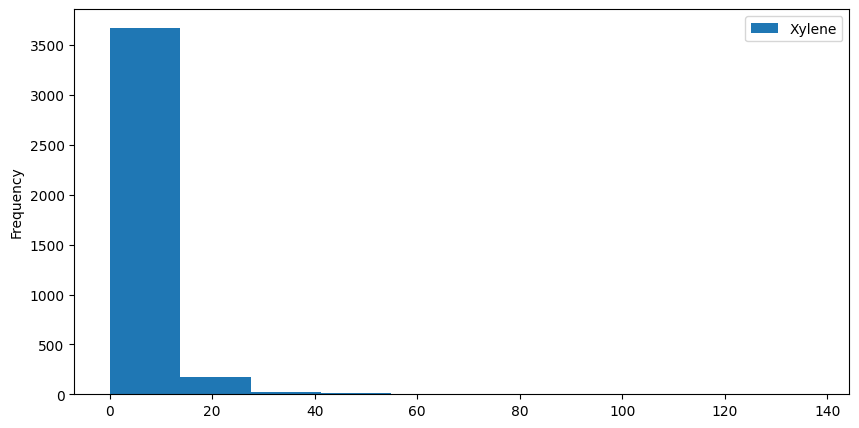

In [17]:
# Univariate analysis
df['Xylene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

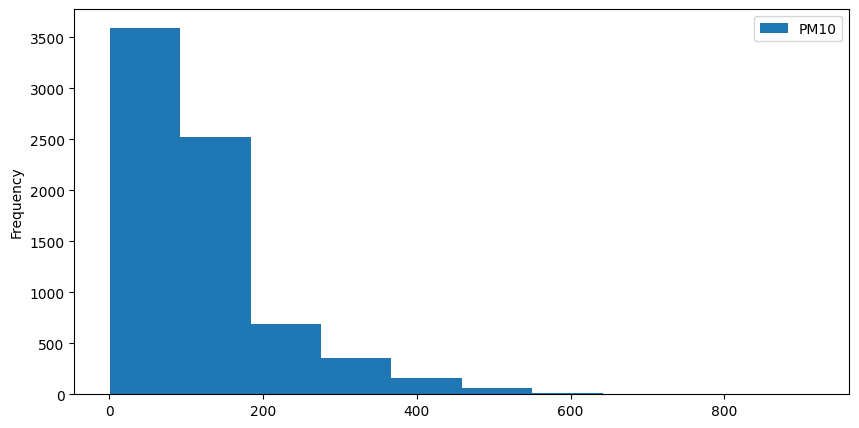

In [18]:
df['PM10'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

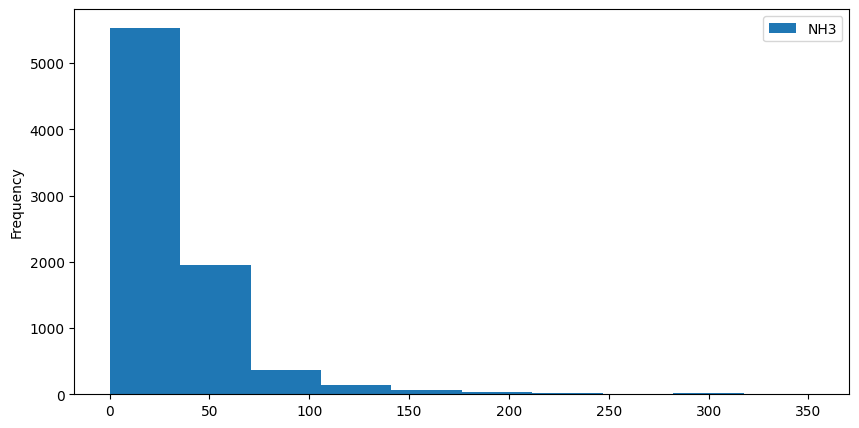

In [19]:
df['NH3'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

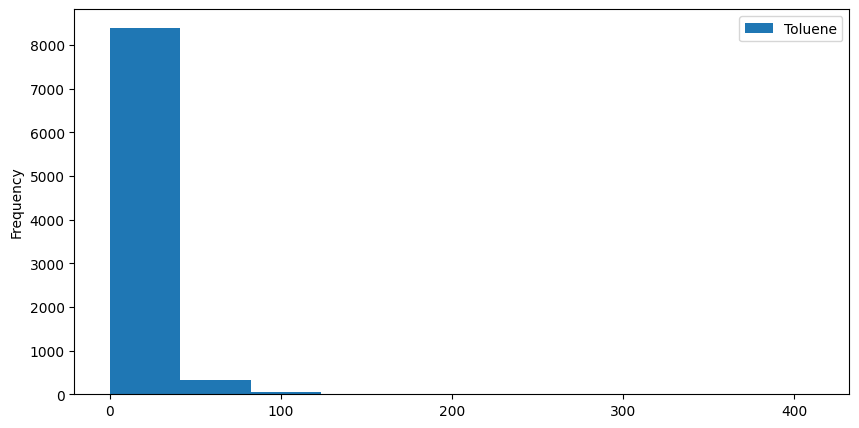

In [20]:
df['Toluene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

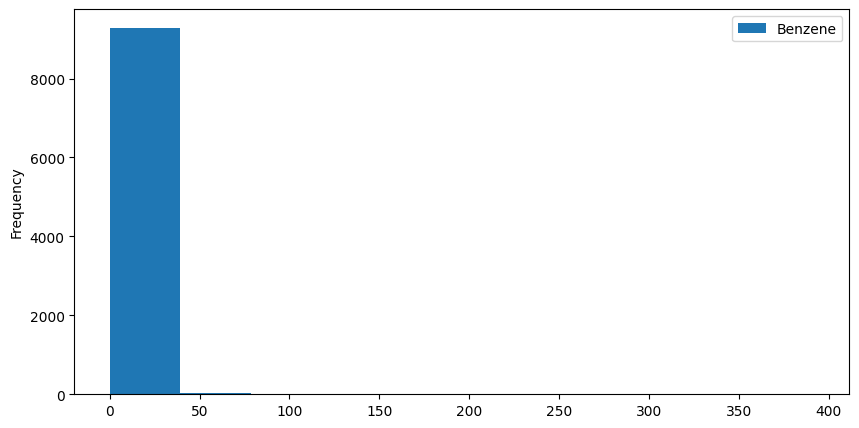

In [21]:
df['Benzene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

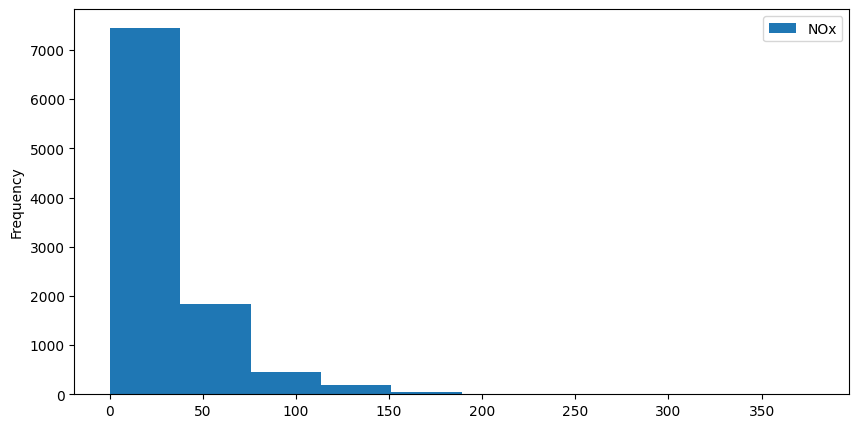

In [22]:
df['NOx'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

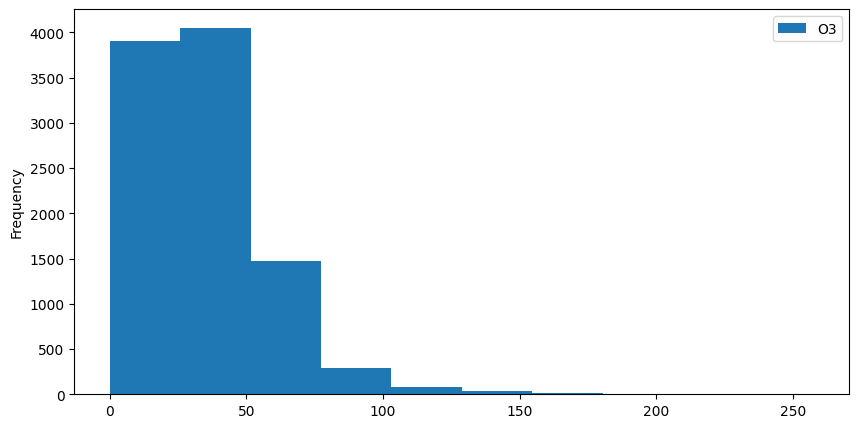

In [23]:
df['O3'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

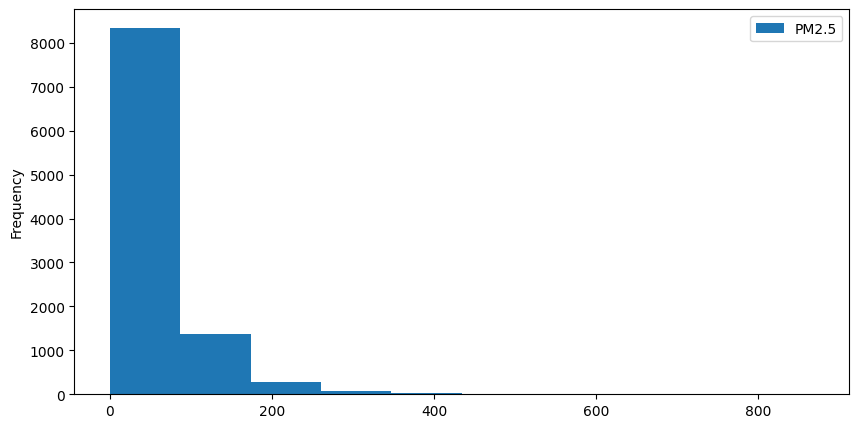

In [24]:
df['PM2.5'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

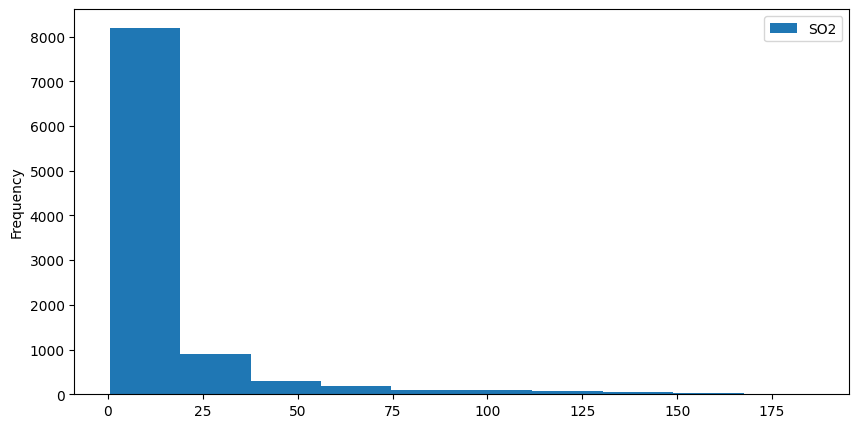

In [25]:
df['SO2'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

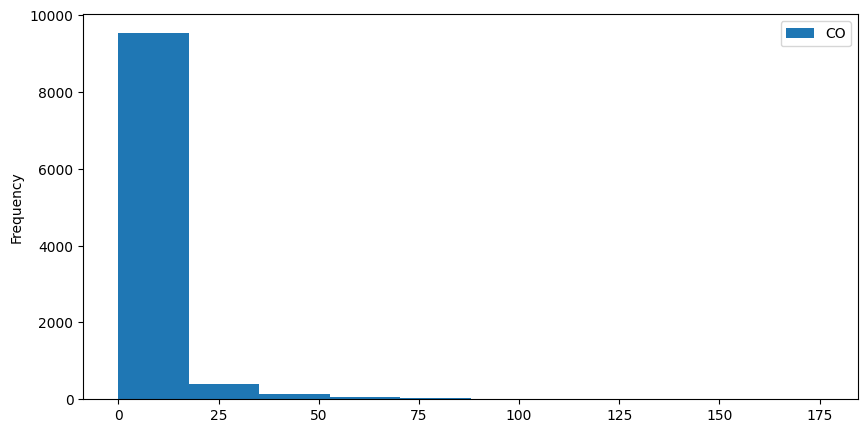

In [26]:
df['CO'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

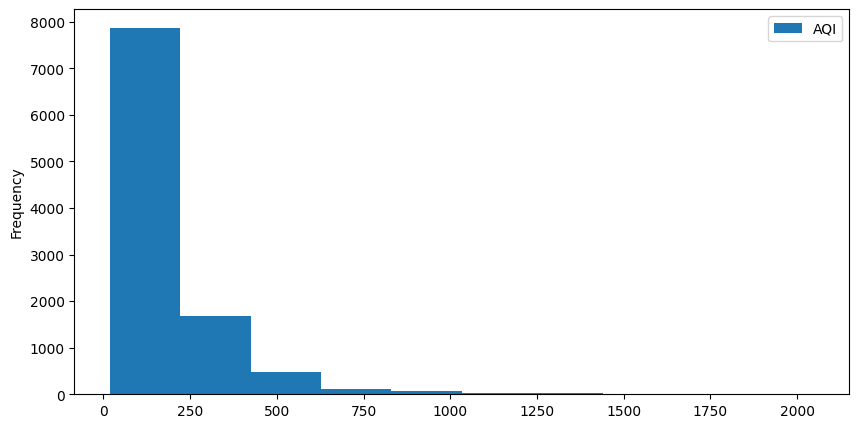

In [27]:
df['AQI'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

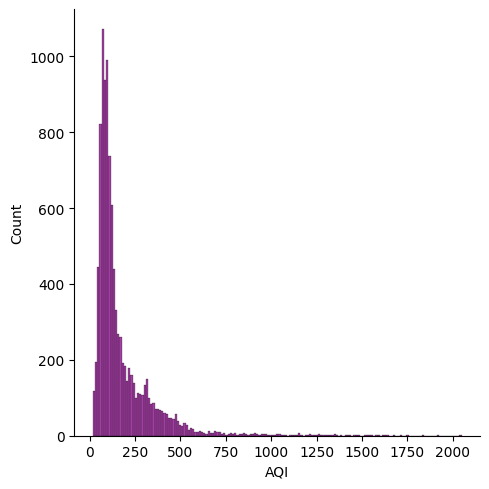

In [28]:
 # Distribution of AQi from 2015 to 2020
sns.displot(df, x='AQI', color='purple')
plt.show()

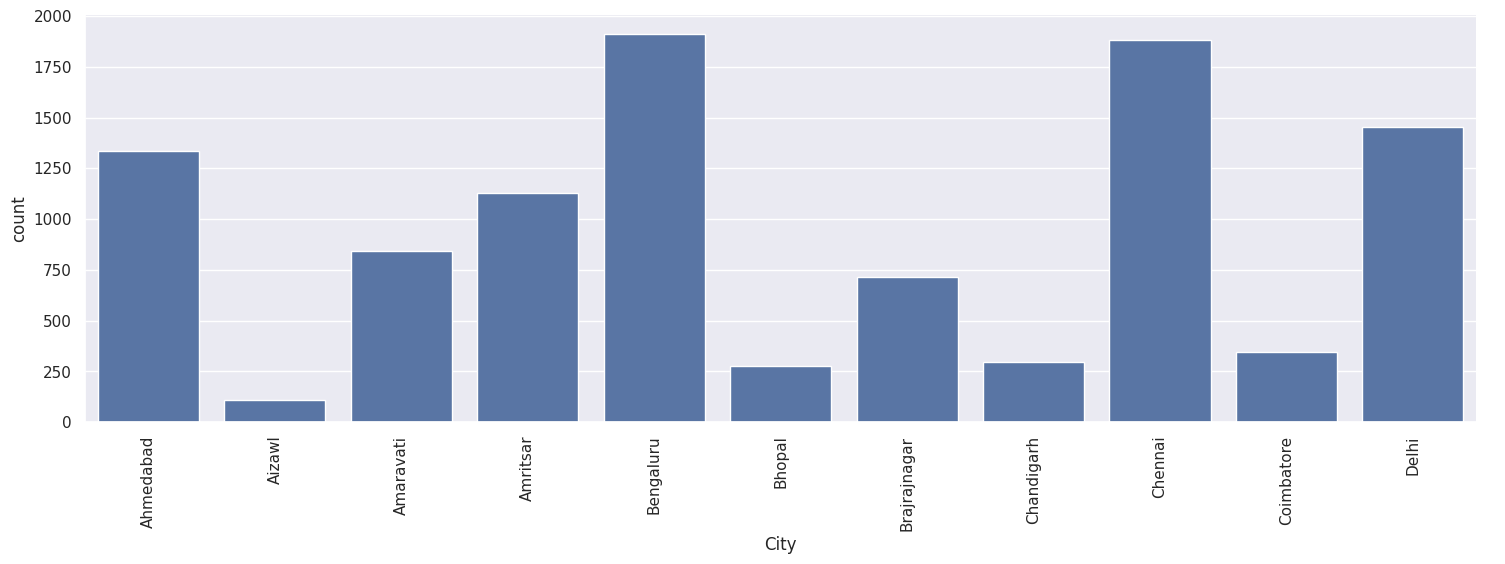

In [29]:
# Bivariate
sns.set_theme(style="darkgrid")
graph = sns.catplot(x="City", kind='count', data=df, height=5, aspect=3)
graph.set_xticklabels(rotation=90)

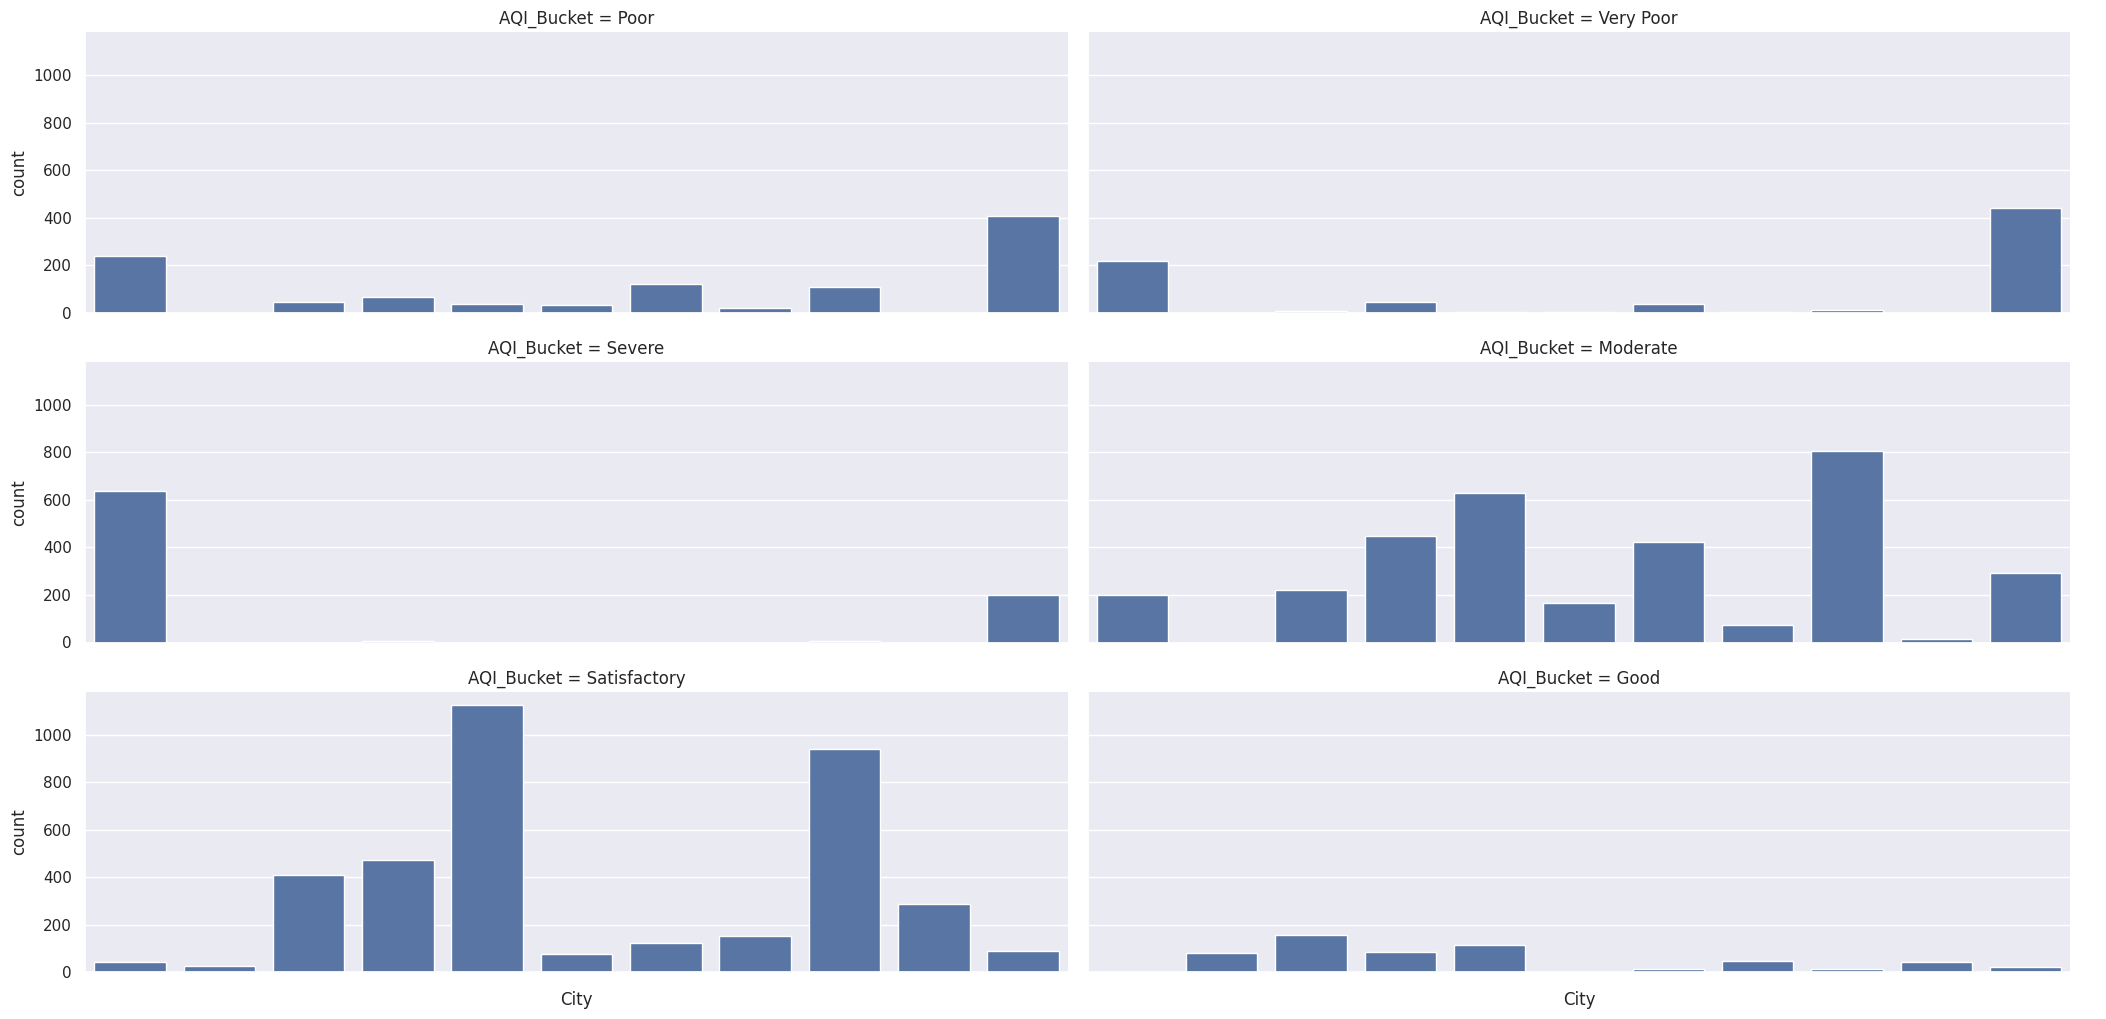

In [30]:
sns.set_theme(style="darkgrid")
graph = sns.catplot(x="City", kind='count', data=df, col="AQI_Bucket", col_wrap=2,
                    height=3.5, aspect=3)
graph.set_xticklabels(rotation=90)

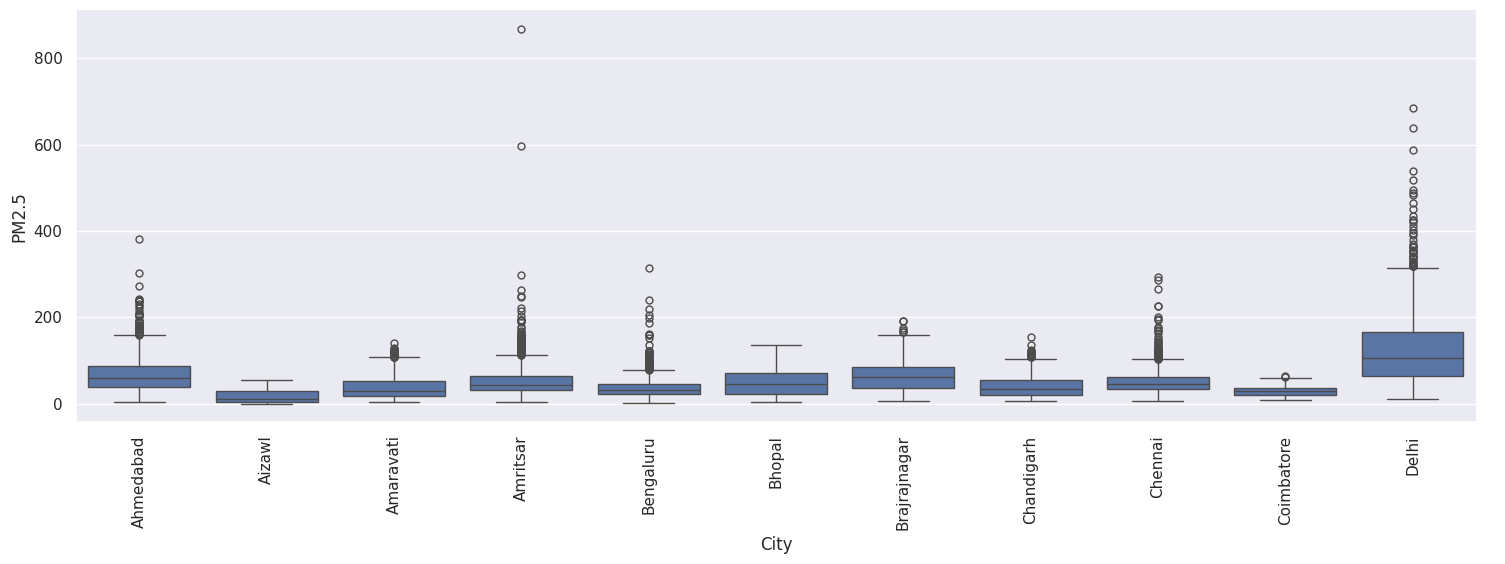

In [31]:
graph1 = sns.catplot(x='City', y='PM2.5', kind='box', data=df, height=5, aspect=3)
graph1.set_xticklabels(rotation=90)

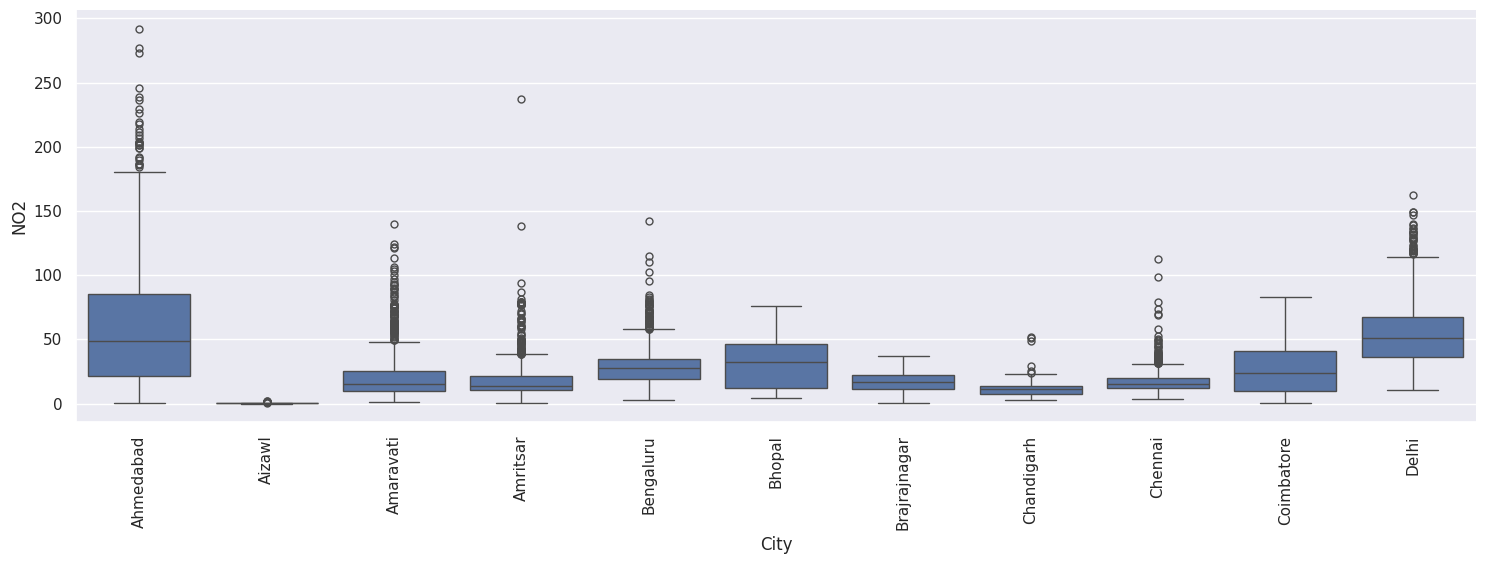

In [32]:
graph2 = sns.catplot(x='City', y='NO2', kind='box', data=df, height=5, aspect=3)
graph2.set_xticklabels(rotation=90)

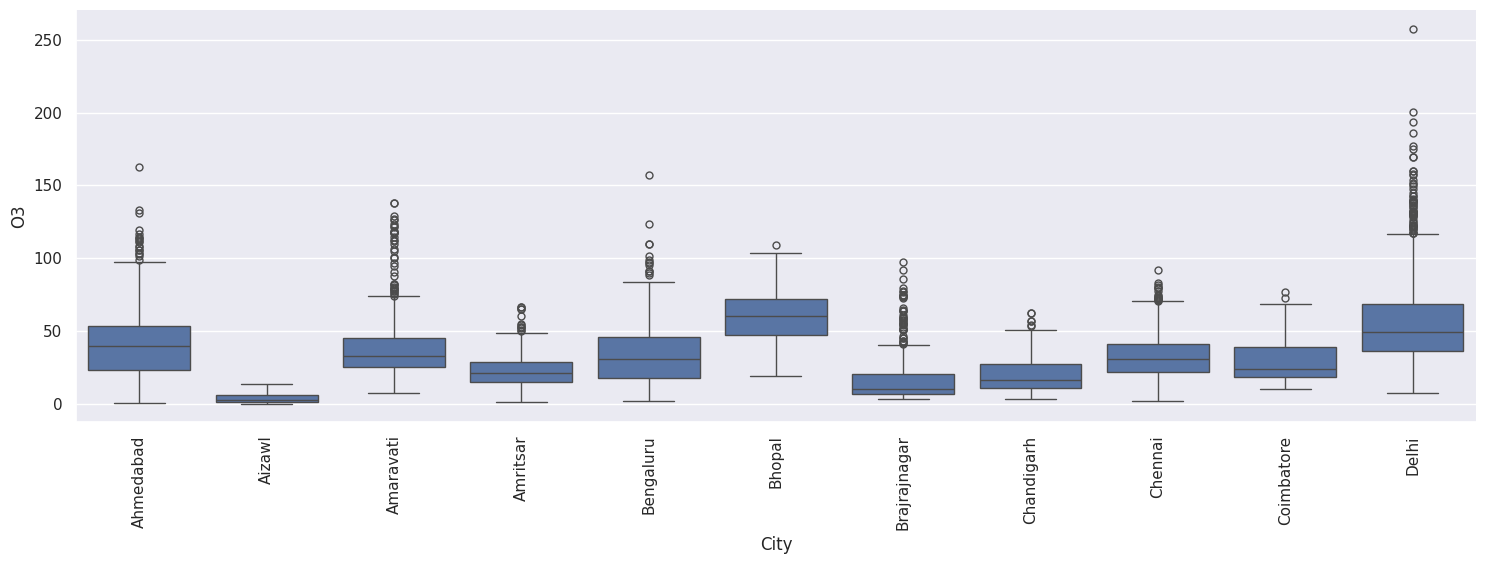

In [33]:
graph3 = sns.catplot(x='City', y='O3', kind='box', data=df, height=5, aspect=3)
graph3.set_xticklabels(rotation=90)

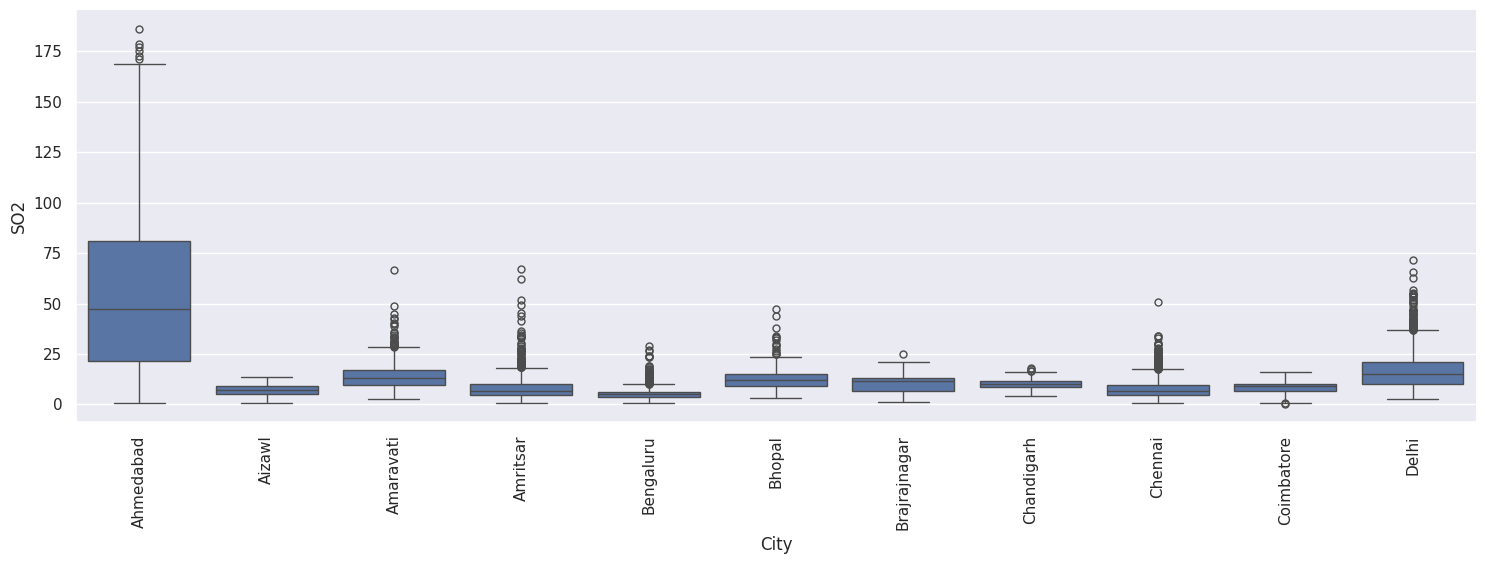

In [34]:
graph4 = sns.catplot(x='City', y='SO2', kind='box', data=df, height=5, aspect=3)
graph4.set_xticklabels(rotation=90)

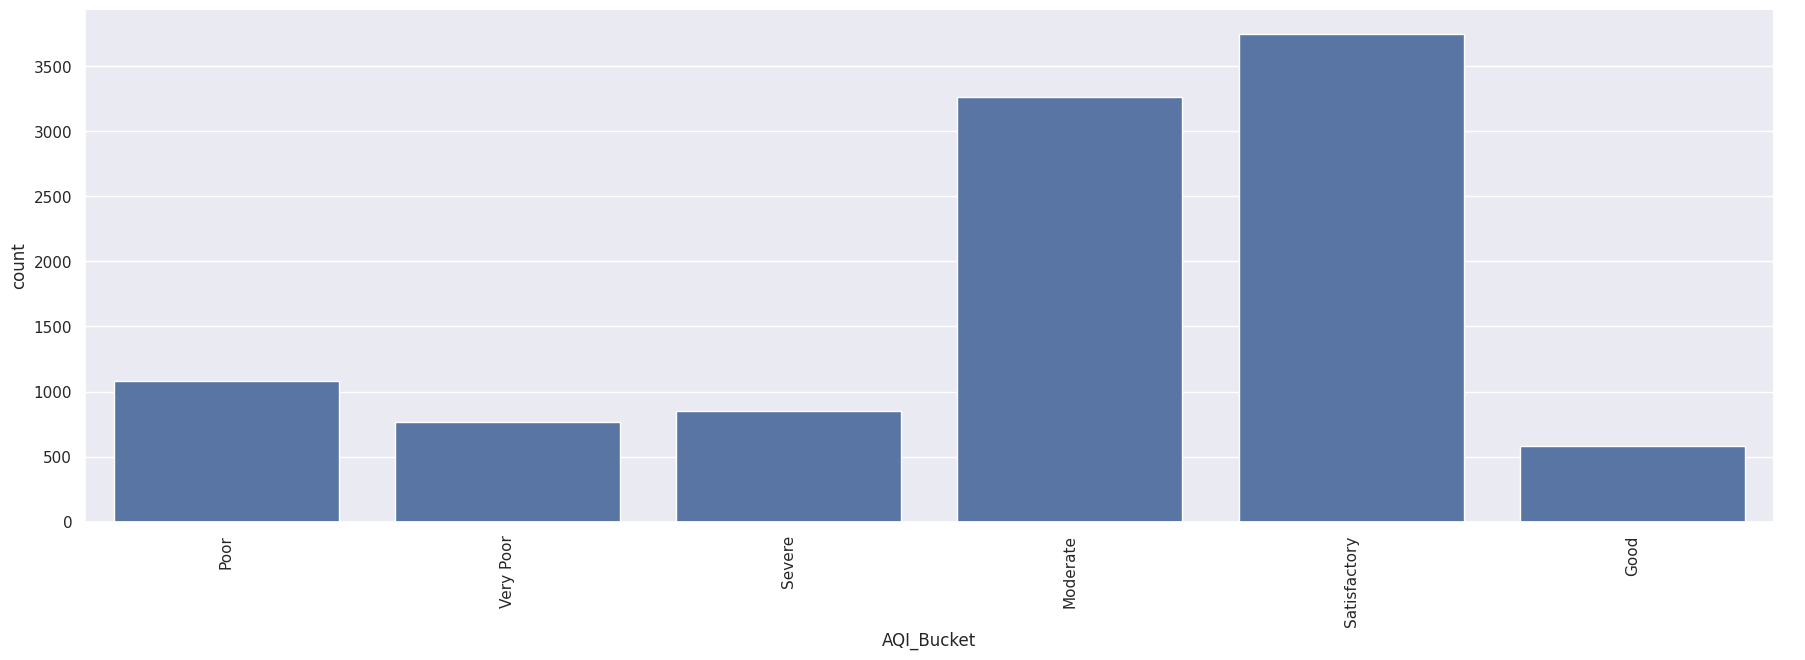

In [35]:
graph5 = sns.catplot(x='AQI_Bucket', data=df, kind='count', height=6, aspect=3)
graph5.set_xticklabels(rotation=90)

In [36]:
# TO check the null values
df.isnull().sum().sort_values(ascending=False)

,0
Xylene,6395
PM10,2900
NH3,2140
Toluene,1493
Benzene,953
O3,444
SO2,329
NOx,283
NO,200
PM2.5,185


In [37]:
df.describe().loc['mean']

,mean
PM2.5,59.729775
PM10,121.160476
NO,16.655936
NO2,30.981325
NOx,30.888706
NH3,32.642448
CO,4.025832
SO2,15.746756
O3,34.903067
Benzene,3.171768


In [38]:
df = df.replace({
    "PM2.5":{np.nan:67.476613},
    "PM10":{np.nan:118.454435},
    "NO": {np.nan:17.622421},
    "NO2": {np.nan:28.978391},
    "NOx": {np.nan:32.289012},
    "NH3": {np.nan:23.848366},
    "CO":  {np.nan:2.345267},
    "SO2": {np.nan:34.912885},
    "O3": {np.nan:38.320547},
    "Benzene": {np.nan:3.458668},
    "Toluene": {np.nan:9.525714},
    "Xylene": {np.nan:3.588683}
})

In [39]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [40]:
df = df.drop(['AQI_Bucket'], axis=1)

In [41]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,Ahmedabad,2015-01-30,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,Ahmedabad,2015-01-31,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,Ahmedabad,2015-02-01,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,Ahmedabad,2015-02-02,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0


<Axes: >

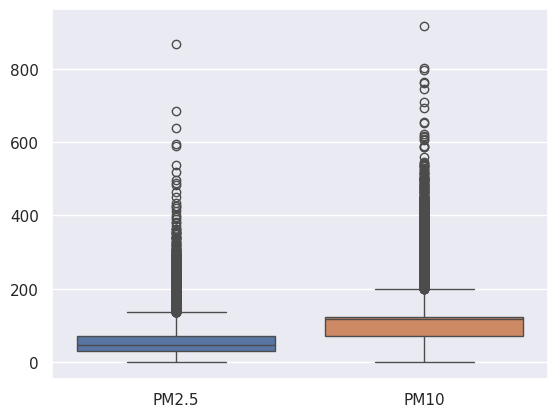

In [42]:
sns.boxplot(data=df[['PM2.5', 'PM10']])

<Axes: >

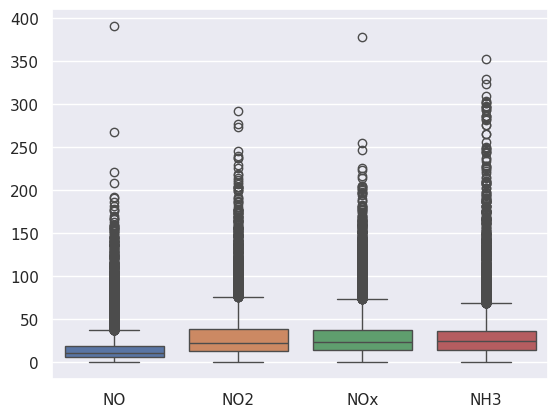

In [43]:
sns.boxplot(data=df[['NO', 'NO2', 'NOx', 'NH3']])

<Axes: >

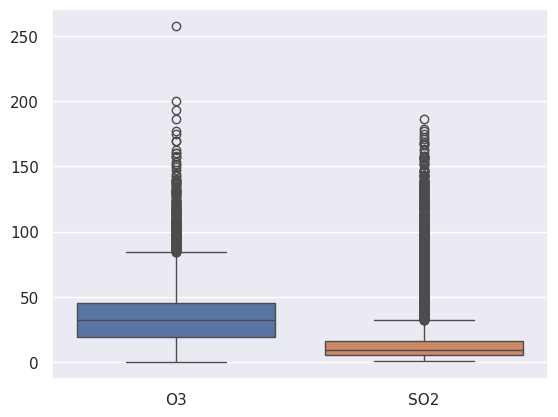

In [44]:
sns.boxplot(data=df[['O3', 'SO2']])

In [45]:
# IQR Method - Q3 Q1
def replace_outliers(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lb = Q1 - 1.5 * IQR
        ub = Q3 + 1.5 * IQR
        df[column] = df[column].apply(
            lambda x: Q1 if x < lb else (Q3 if x > ub else x)
        )
    return df

In [46]:
df = replace_outliers(df)

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,10293.0,50.853303,27.489219,0.16,29.10,45.770000,71.650000,135.42
PM10,10293.0,100.671678,38.695832,0.21,70.68,118.454435,122.290000,199.68
NO,10293.0,11.963119,7.827646,0.03,5.78,10.230000,18.140000,36.67
NO2,10293.0,26.035057,16.287516,0.05,13.16,21.720000,38.240000,75.84
NOx,10293.0,25.692231,16.007867,0.00,13.79,23.040000,37.720000,73.58
NH3,10293.0,25.261518,14.116270,0.02,14.32,23.848366,35.850000,68.11
CO,10293.0,1.095010,0.723867,0.00,0.60,0.930000,1.850000,3.72
SO2,10293.0,10.512670,6.051434,0.48,5.59,9.230000,16.210000,32.01
O3,10293.0,33.205602,17.566676,0.04,19.48,32.230000,45.370000,84.14
Benzene,10293.0,2.042925,1.934528,0.00,0.22,1.510000,3.458668,8.31


<Axes: >

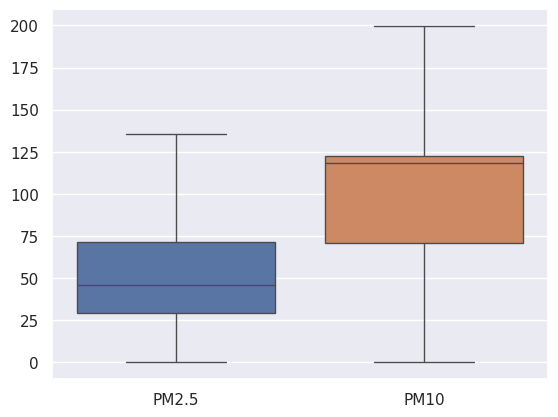

In [48]:
sns.boxplot(data=df[['PM2.5', 'PM10']])

<Axes: >

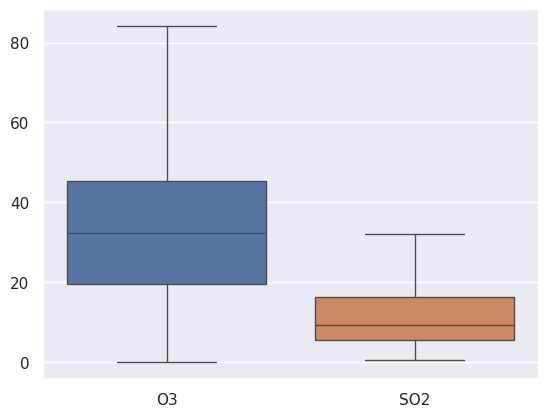

In [49]:
sns.boxplot(data=df[['O3', 'SO2']])

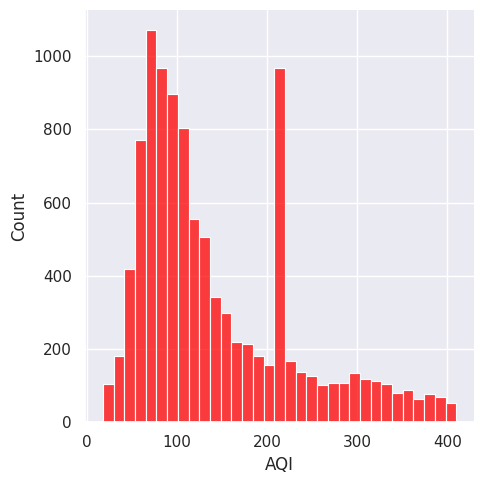

In [50]:
sns.displot(df, x='AQI', color='red')
plt.show()

In [51]:
df1 = df.drop(columns=['City'])

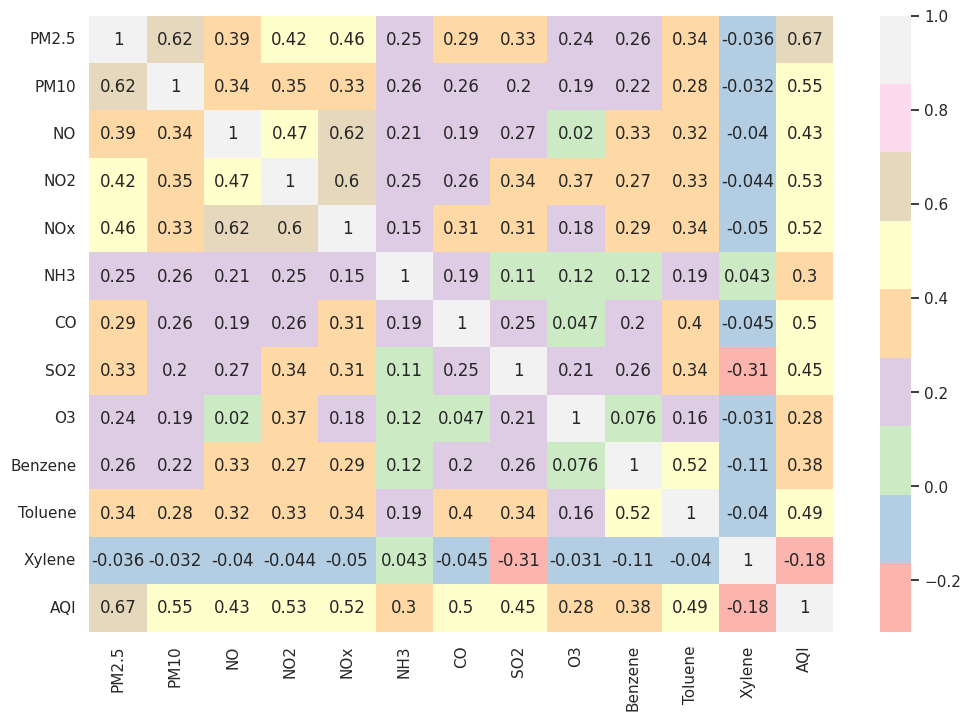

In [52]:
# Multivariate Analysis - Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df1.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='Pastel1')
plt.show()

In [53]:
df.drop(['Date', 'City'], axis = 1, inplace=True)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.13,118.454435,6.93,28.71,33.72,23.848366,1.85,16.21,59.76,0.02,0.00,3.140000,209.0
29,79.84,118.454435,13.85,28.68,41.08,23.848366,1.85,16.21,45.37,0.04,0.00,3.588683,328.0
30,94.52,118.454435,24.39,32.66,52.61,23.848366,1.85,16.21,45.37,0.24,0.01,3.588683,211.0
31,71.65,118.454435,18.14,42.08,37.72,23.848366,1.85,16.21,45.37,0.40,0.04,3.588683,211.0
32,71.65,118.454435,18.14,35.31,72.80,23.848366,1.85,16.21,45.37,0.46,0.06,3.588683,211.0


In [54]:
# Scaling - Standard Scaler
from sklearn.preprocessing import StandardScaler
df1 = StandardScaler().fit_transform(df)
df1

array([[ 1.17421543,  0.45957458, -0.64302394, ..., -1.07703294,
        -2.72730169,  0.76729374],
       [ 1.05452633,  0.45957458,  0.24106516, ..., -1.07703294,
         0.55681864,  2.14657729],
       [ 1.58857981,  0.45957458,  1.58764016, ..., -1.07492986,
         0.55681864,  0.79047497],
       ...,
       [ 0.75657688,  0.55870028,  0.78914929, ...,  0.92630056,
        -1.62938167,  0.79047497],
       [ 0.75657688,  0.55870028,  0.78914929, ...,  0.92630056,
        -1.62938167,  0.79047497],
       [ 0.75657688,  0.55870028,  0.78914929, ...,  0.92630056,
        -1.62938167,  0.79047497]])

In [55]:
df = pd.DataFrame(df1, columns=df.columns)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,1.174215,0.459575,-0.643024,0.164241,0.501513,-0.100113,1.043046,0.94153,1.511708,-1.045745,-1.077033,-2.727302,0.767294
1,1.054526,0.459575,0.241065,0.162399,0.961310,-0.100113,1.043046,0.94153,0.692504,-1.035406,-1.077033,0.556819,2.146577
2,1.588580,0.459575,1.587640,0.406770,1.681615,-0.100113,1.043046,0.94153,0.692504,-0.932017,-1.074930,0.556819,0.790475
3,0.756577,0.459575,0.789149,0.985155,0.751403,-0.100113,1.043046,0.94153,0.692504,-0.849305,-1.068621,0.556819,0.790475
4,0.756577,0.459575,0.789149,0.569479,2.942932,-0.100113,1.043046,0.94153,0.692504,-0.818288,-1.064414,0.556819,0.790475


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [58]:
# Feature & Target Selection
X = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene']]
y = df['AQI']

In [59]:
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,1.174215,0.459575,-0.643024,0.164241,0.501513,-0.100113,1.043046,0.94153,1.511708,-1.045745,-1.077033,-2.727302
1,1.054526,0.459575,0.241065,0.162399,0.961310,-0.100113,1.043046,0.94153,0.692504,-1.035406,-1.077033,0.556819
2,1.588580,0.459575,1.587640,0.406770,1.681615,-0.100113,1.043046,0.94153,0.692504,-0.932017,-1.074930,0.556819
3,0.756577,0.459575,0.789149,0.985155,0.751403,-0.100113,1.043046,0.94153,0.692504,-0.849305,-1.068621,0.556819
4,0.756577,0.459575,0.789149,0.569479,2.942932,-0.100113,1.043046,0.94153,0.692504,-0.818288,-1.064414,0.556819


In [60]:
# Split the data into training and testing data - Training set - 80% | Testing set - 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shape of X Train',X_train.shape)
print('Shape of X Test',X_test.shape)
print('Shape of y Train',y_train.shape)
print('Shape of y Test',y_test.shape)

Shape of X Train (8234, 12)
Shape of X Test (2059, 12)
Shape of y Train (8234,)
Shape of y Test (2059,)


In [61]:
# Linear Regression Model
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [62]:
# Predicting the values:
train_pred = LR.predict(X_train) # Predicting train
test_pred = LR.predict(X_test) # Predicting test

In [63]:
# Evaluation for Linear Regression
RMSE_train = (np.sqrt(mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_pred)))
print('RMSE Train Data = ', str(RMSE_train))
print('RMSE Test Data = ', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train = ', LR.score(X_train, y_train))
print('R Squared value on Test = ', LR.score(X_test, y_test))

RMSE Train Data =  0.5722839787557317
RMSE Test Data =  0.5475943839357909
____________________________________________________________
R Squared value for Train =  0.6745759922361624
R Squared value on Test =  0.6921130256737574


In [64]:
# KNN
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [65]:
# Predicting the values:
train_pred = knn.predict(X_train) # Predicting train
test_pred = knn.predict(X_test) # Predicting test

# Evaluation for KNN
RMSE_train = (np.sqrt(mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_pred)))
print('RMSE Train Data = ', str(RMSE_train))
print('RMSE Test Data = ', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train = ', knn.score(X_train, y_train))
print('R Squared value on Test = ', knn.score(X_test, y_test))

RMSE Train Data =  0.3637707149258385
RMSE Test Data =  0.4512200550878361
____________________________________________________________
R Squared value for Train =  0.8685132833490977
R Squared value on Test =  0.7909500185552


In [66]:
# Decision Tree
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [67]:
# Predicting the values:
train_pred = dtr.predict(X_train) # Predicting train
test_pred = dtr.predict(X_test) # Predicting test

# Evaluation for Decision Tree Regressor
RMSE_train = (np.sqrt(mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_pred)))
print('RMSE Train Data = ', str(RMSE_train))
print('RMSE Test Data = ', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train = ', dtr.score(X_train, y_train))
print('R Squared value on Test = ', dtr.score(X_test, y_test))

RMSE Train Data =  0.023215325954803263
RMSE Test Data =  0.5421910873510379
____________________________________________________________
R Squared value for Train =  0.9994644796423326
R Squared value on Test =  0.6981590955907637


In [68]:
# Random Forest Regressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [69]:
# Predicting the values:
train_pred = rfr.predict(X_train) # Predicting train
test_pred = rfr.predict(X_test) # Predicting test

# Evaluation for Randome Forest Regressor
RMSE_train = (np.sqrt(mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_pred)))
print('RMSE Train Data = ', str(RMSE_train))
print('RMSE Test Data = ', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train = ', rfr.score(X_train, y_train))
print('R Squared value on Test = ', rfr.score(X_test, y_test))

RMSE Train Data =  0.1453877132576172
RMSE Test Data =  0.40600246456670486
____________________________________________________________
R Squared value for Train =  0.9789969761713363
R Squared value on Test =  0.8307492177108446
